
# Solving nonlinear equations

In [1]:

using PyPlot


The test equation:

In [2]:

f(x) = exp(-x) - x

f (generic function with 1 method)


Let's plot a graph of f(x)

In [3]:

xmin = -1.0
xmax = 3.0
np = 100
x = range(xmin, xmax, np)
y = f.(x);

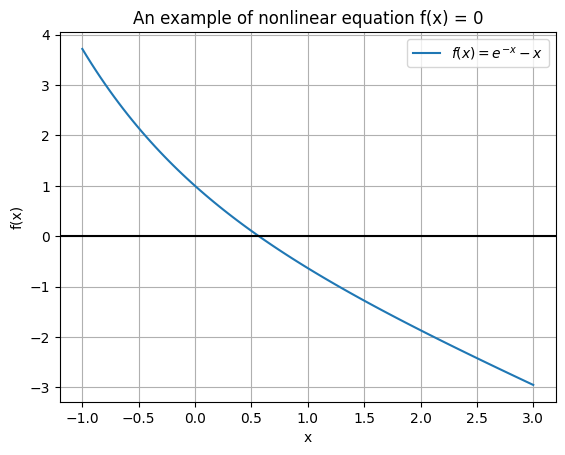

In [4]:

plot(x, y, label=L"f(x) = e^{-x} - x")
axhline(color="black")
grid(true)
xlabel("x")
ylabel("f(x)")
title("An example of nonlinear equation f(x) = 0")
legend();


By visual inspection: the root of nonlinear equation is on the interval (0.0, 1.0)


## Bisection method

In [5]:

"""
    rt, ni = mybisection(f, a, b, abstol)

Solve nonlinear equation f(x) = 0 using bisection. a and b are the endpoints of the initial bracketing interval. 
abstol is the acceptble error of the solution.

mybisection() return the approximation for the root of the equation and the number of iterations.
"""
function mybisection(f, a, b, abstol)
    fa = f(a)
    fb = f(b)
    sa = sign(fa)
    sb = sign(fb)
    if sa == sb
        error("The provided interval [$a,$b] does not contain a root of the equation f(x)=0")
    end
    ni = 0
    while abs(b - a) > abstol
        ni += 1
        m = a + (b - a)/2
        fm = f(m)
        sm = sign(fm)
        if sm == sb
            b = m
            sb = sm
        else
            a = m
            sa = sm
        end
    end
    return a, ni
end

mybisection

In [6]:

xb, nb = mybisection(f, 0.0, 1.0, eps()/2)

(0.5671432904097838, 53)

In [7]:

f(xb) ≈ 0.0

true


## Newton's method

In [8]:

"""
    rt, ni = mynewtons(f, fp, xin, abstol, itmax)

Solve nonlinear equation f(x) = 0 using Newton's method. fp(x) = f'(x). xin is initial approximaption of the root. 
abstol is the acceptble error of the solution. itmax is the maximal number of iterations.

mynewtons() return the approximation for the root of the equation and the number of iterations.
"""
function mynewtons(f, fp, xin, abstol, itmax)
    x = xin
    fx = f(x)
    fpx = fp(x)
    delta = - fx/fpx
    ni = 0
    while abs(delta) > abstol
        ni += 1
        if ni == itmax
            break
        end
        x += delta
        fx = f(x)
        fpx = fp(x)
        delta = - fx/fpx
    end
    return x, ni
end

mynewtons

In [9]:

fp(x) = -exp(-x) - 1.0

fp (generic function with 1 method)

In [10]:

itmax = 55;

In [11]:

xn, nn = mynewtons(f, fp, 1.0, eps(), itmax)

(0.5671432904097838, 4)

In [12]:

xn ≈ xb

true

In [13]:

f(xn) ≈ 0.0

true


### An example of a nonlinear equation where Newton's method always fails:


$$f(x) = \mathrm{sign}(x - 1) \, \sqrt{|x - 1|}$$

In [14]:

ff(x) = sign(x - 1.0) * sqrt(abs(x - 1.0))

ff (generic function with 1 method)

In [15]:

umin = -3.0
umax = 5.0
npf = 500
u = range(umin, umax, npf);

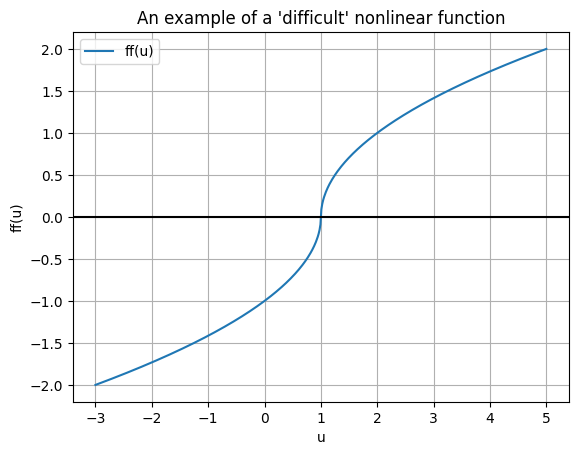

In [16]:

plot(u, ff.(u), label="ff(u)")
axhline(color="black")  # yzero axis
grid(true)
xlabel("u")
ylabel("ff(u)")
title("An example of a 'difficult' nonlinear function")
legend();

There is an isolated zero at u = 1.0

In [17]:

ffp(x) = 1/(2*sqrt(abs(x - 1.0)))

ffp (generic function with 1 method)

In [18]:

uf, nf = mynewtons(ff, ffp, 1.1, eps(), itmax)

(1.1, 55)

In [19]:

uf, nf = mynewtons(ff, ffp, 1.01, eps(), itmax)

(1.01, 55)

In [20]:

uf, nf = mynewtons(ff, ffp, 11.0, eps(), itmax)

(11.0, 55)


Bisection method has no troubles finding the root:

In [21]:

xf, nf = mybisection(ff, 0.0, 2.0, eps())

(1.0, 53)


### An example of a nonlinear equation where Newton's method 'sometimes' fails:


$$f(x) = \frac{x - 1}{(x - 1)^2 + 1}$$

In [22]:

ffs(x) = (x - 1.0)/((x-1.0)^2 + 1.0)

ffs (generic function with 1 method)

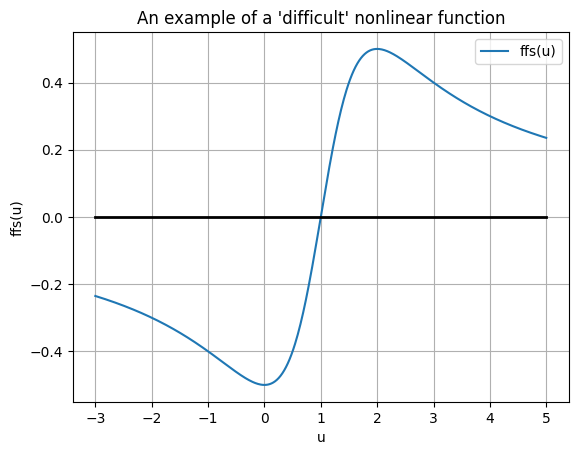

In [23]:

plot(u, ffs.(u), label="ffs(u)")
plot([umin, umax], [0.0, 0.0], linewidth=2, color="black")  # yzero axis
grid(true)
xlabel("u")
ylabel("ffs(u)")
title("An example of a 'difficult' nonlinear function")
legend();


There is an isolated zero at u = 1.0

In [24]:

ffsp(x) = (1.0 - (x - 1.0)^2) /((x-1.0)^2 + 1.0)^2

ffsp (generic function with 1 method)

In [25]:

ufs, nfs = mynewtons(ffs, ffsp, 3.0, eps(), itmax)

(5.033433610339778e16, 55)

In [26]:

ufs, nfs = mynewtons(ffs, ffsp, -1.0, eps(), itmax)

(-5.033433610339776e16, 55)

In [27]:

ufs, nfs = mynewtons(ffs, ffsp, 0.5, eps(), itmax)

(1.0, 5)

Bisection method has no troubles finding the root:

In [28]:

xfs, nfs = mybisection(ffs, 0.0, 2.0, eps())

(1.0, 53)


## Julia package for solving nonlinear equations

In [31]:

using Roots

In [30]:
] add Roots

   Resolving package versions...
   Installed Roots ─ v2.2.10
    Updating `/workspaces/phys2200-lectures-anb19019/Project.toml`
  [f2b01f46] + Roots v2.2.10
    Updating `/workspaces/phys2200-lectures-anb19019/Manifest.toml`
  [f2b01f46] + Roots v2.2.10
Precompiling project...
   3141.1 ms  ✓ Roots
  1 dependency successfully precompiled in 5 seconds. 165 already precompiled.



A test function with several roots:

In [32]:

f2(x) = x^5 - x + 1/4

f2 (generic function with 1 method)

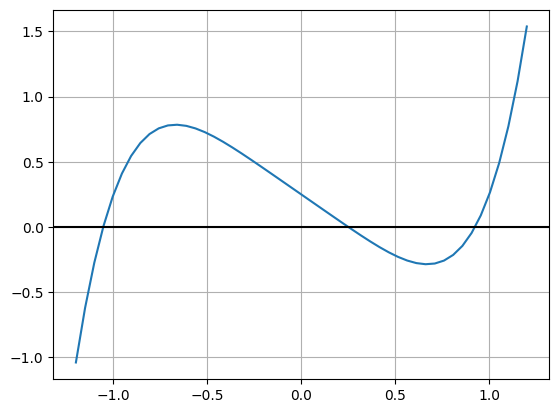

In [33]:
np = 50
s = range(-1.2, 1.2, np)

plot(s, f2.(s))
axhline(color="black")
grid(true)


For the zero between two values at which the function changes sign,
a bracketing method, such as bisection, is useful, as bracketing methods are guaranteed
to converge for continuous functions. 

A bracketing algorithm will
be used when the initial data is passed as a tuple:

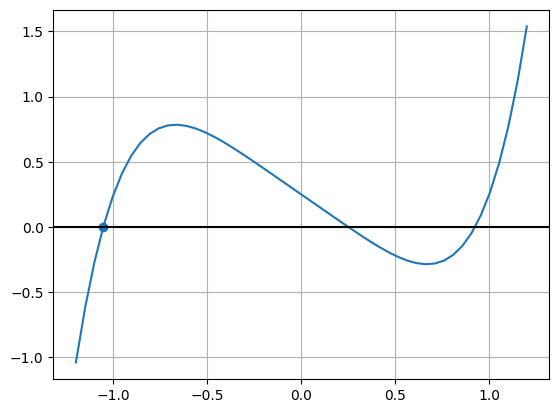

In [34]:

r = find_zero(f2, (-1.2,  -1.0))
scatter(r, f2(r), marker="o")

plot(s, f2.(s))
axhline(color="black")
grid(true)

For the zeros near a point, a non-bracketing method is often used.

Passing just an initial guess will dispatch to such a method.

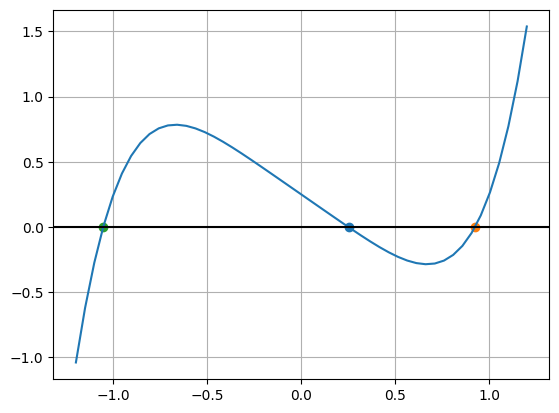

In [35]:

r2 = find_zero(f2,  0.6)
r3 = find_zero(f2,  1.0)

scatter(r2, f2(r2), marker="o")
scatter(r3, f2(r3), marker="o")

scatter(r, f2(r), marker="o")
plot(s, f2.(s))
axhline(color="black")
grid(true)


Find all zeros in an interval:

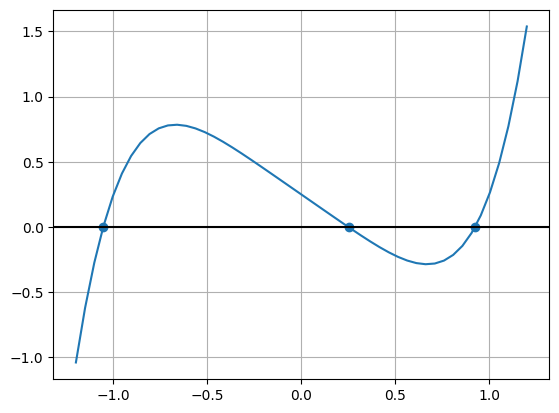

In [36]:

zs = find_zeros(f2, -1.2, 1.2)
scatter(zs, f2.(zs), marker="o")

plot(s, f2.(s))
axhline(color="black")
grid(true)


### Functions can have parameters

The following is a function having (-1/2, 1/2) as a bracket
when p = 0. By passing in values of p to `find_zero`,
different problems may be solved.

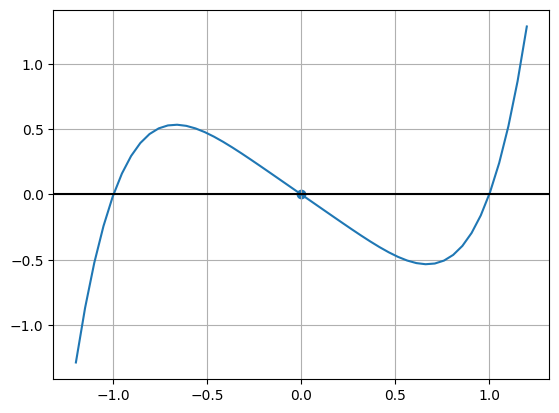

In [37]:

fp(x, p) = x^5 - x + p

p = 0.0

r = find_zero(fp, (-1/2, 1/2), p)

plot(s, fp.(s, p))
scatter(r, fp(r, p), marker="o")
axhline(color="black")
grid(true)